In [1]:
import fastbook
fastbook.setup_book()

In [2]:
#!pip install fastbook
from fastbook import *
from fastai.vision.widgets import *
import time

We are going to use a computer vision example to look at the end to end process of creating a deep learning application.More specifically we are going to build a bear classifier while
1.discussing constraints of deep learning
2. how to create data sets
3. look at possible gotchas when using deep learning.

lets start with how to frame your problem

## The practice of deep learning

We've seen that deep learning can solve a lot of challenging problems quickly and with little code. As a beginner, there's a sweet spot of problems that are similar enough to our example problems that you can very quickly get extremely useful results. However, deep learning isn't magic! The same 6 lines of code won't work for every problem anyone can think of today. Underestimating the constraints and overestimating the capabilities of deep learning may lead to frustratingly poor results, at least until you gain some experience and can solve the problems that arise. Conversely, overestimating the constraints and underestimating the capabilities of deep learning may mean you do not attempt a solvable problem because you talk yourself out of it. 

We often talk to people who underestimate both the constraints and the capabilities of deep learning. Both of these can be problems: underestimating the capabilities means that you might not even try things that could be very beneficial, and underestimating the constraints might mean that you fail to consider and react to important issues.

The best thing to do is to keep an open mind. If you remain open to the possibility that deep learning might solve part of your problem with less data or complexity than you expect, then it is possible to design a process where you can find the specific capabilities and constraints related to your particular problem as you work through the process. This doesn't mean making any risky bets — we will show you how you can gradually roll out models so that they don't create significant risks, and can even backtest them prior to putting them in production.

### Strating your project

1. ensure you have some project to work on to gain experience
2. dont spend months and months fine-tuning your model or polishing your perfect GUI or labeling your perfect data sset. Instead complete every step as well as you can in a reasonable amount of time, all the way to the end.
3. start a project where data is available
4. dont branch out to new sectors where deep learning has not yet reached

lets check out the current state of deep learning

### computer vision

this is the analysis of images through use of a computer. computers have been generally shown to recognize what items are in a image ans well as people can, or even better! This is known as object recognition.
bt the problem is, DL algorithms can't recognize images that are significantly different in structure or style  to those used to train the model. For instance if we provided a black and white image to our first lesson's model, the model would have done poorly.There is no general way to check what types of images are missing in your training set, but we wll show in this chapter some ways to try to recognize what unexpected image types arise in the dat when the model is used in production.

One major challenge for object detection systems is that image labelling can be slow and expensive. There is a lot of work at the moment going into tools to try to make this labelling faster and easier, and to require fewer handcrafted labels to train accurate object detection models. One approach that is particularly helpful is to synthetically generate variations of input images, such as by rotating them or changing their brightness and contrast; this is called *data augmentation* and also works well for text and other types of models. We will be discussing it in detail in this chapter.

Another point to consider is that although your problem might not look like a computer vision problem, it might be possible with a little imagination to turn it into one. For instance, if what you are trying to classify are sounds, you might try converting the sounds into images of their acoustic waveforms and then training a model on those images.

###  text (natural language processing)

Computers are very good at classifying both short and long documents based on categories such as spam or not spam, sentiment (e.g., is the review positive or negative), author, source website, and so forth. We are not aware of any rigorous work done in this area to compare them to humans, but anecdotally it seems to us that deep learning performance is similar to human performance on these tasks. Deep learning is also very good at generating context-appropriate text, such as replies to social media posts, and imitating a particular author's style. It's good at making this content compelling to humans too—in fact, even more compelling than human-generated text. However, deep learning is currently not good at generating *correct* responses! We don't currently have a reliable way to, for instance, combine a knowledge base of medical information with a deep learning model for generating medically correct natural language responses. This is very dangerous, because it is so easy to create content that appears to a layman to be compelling, but actually is entirely incorrect.

Another concern is that context-appropriate, highly compelling responses on social media could be used at massive scale—thousands of times greater than any troll farm previously seen—to spread disinformation, create unrest, and encourage conflict. As a rule of thumb, text generation models will always be technologically a bit ahead of models recognizing automatically generated text. For instance, it is possible to use a model that can recognize artificially generated content to actually improve the generator that creates that content, until the classification model is no longer able to complete its task.

Despite these issues, deep learning has many applications in NLP: it can be used to translate text from one language to another, summarize long documents into something that can be digested more quickly, find all mentions of a concept of interest, and more. Unfortunately, the translation or summary could well include completely incorrect information! However, the performance is already good enough that many people are using these systems—for instance, Google's online translation system (and every other online service we are aware of) is based on deep learning.

# alot of notes here so skip? yeah, skip.


In [24]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [25]:
ins = search_images_ddg('grizzly bear', max_images=30)
len(ins)

30

weve succesfully downloaded 30 images of grizzly bears. could be 200 but limited due to shitty internet

In [26]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [28]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

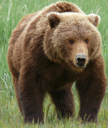

In [29]:
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, so let's use fastai's `download_images` to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [3]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [35]:

for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    try:
        download_images(dest, urls=search_images_ddg(f'{o} bear'), max_pics=50, timeout=10)
    except Exception as e:
        print(f"error downloading {o} bear images: {e}")
        #   wait for a bit before retrying
        time.sleep(5)
        try:
            download_images(dest, urls=search_images_ddg(f'{o} bear'), max_pics=50, timeout=10)
        except Exception as e:
            print(f"Failed to download {o} bear images: {e}")

In [12]:

if not path.exists():
    path.mkdir()
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    try:
        download_images(dest, urls=search_images_ddg(f'{o} bear'), max_pics=50, timeout=10)
    except Exception as e:
        print(f"error downloading {o} bear images: {e}")
        #   wait for a bit before retrying
        time.sleep(5)
        try:
            download_images(dest, urls=search_images_ddg(f'{o} bear'), max_pics=50, timeout=10)
        except Exception as e:
            print(f"Failed to download {o} bear images: {e}")
                

error downloading grizzly bear images: <urlopen error [Errno 11001] getaddrinfo failed>
Failed to download grizzly bear images: <urlopen error [Errno 11001] getaddrinfo failed>


In [ ]:
?download_images

In [4]:
fns = get_image_files(path)
fns

(#207) [Path('bears/black/0086a872-4440-4bd3-bb40-b7f5e4ec262f.jpg'),Path('bears/black/06543125-dfaa-404d-8525-235ceb41054a.jpg'),Path('bears/black/0665f7e6-a1e2-48bd-ab4f-5f280839e3f5.jpg'),Path('bears/black/094dcb11-1ea3-4d04-9382-6aeb5825eb3f.jpg'),Path('bears/black/094e3d7d-680b-490f-b134-e0e7a5abe9c6.jpg'),Path('bears/black/11ef973e-6178-418f-834e-4c8d62fce1f2.jpg'),Path('bears/black/13d8b4a1-d7cb-420e-8701-b538296ae423.jpg'),Path('bears/black/1471a1ba-de53-482a-8e23-a71d66ff0eeb.jpg'),Path('bears/black/192a1d1a-7402-419f-9d88-3f7e22310a7a.jpg'),Path('bears/black/199a4021-e40f-46ed-aab8-46d640436ef1.jpg')...]

In [5]:
failed = verify_images(fns)
failed

KeyboardInterrupt: 

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [ ]:
failed.map(Path.unlink)

(#0) []

## From Data to DataLoaders

Later in the book you'll also learn about the `Dataset` and `Datasets` classes, which have the same relationship.

To turn our downloaded data into a `DataLoaders` object we need to tell fastai at least four things:

- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

So far we have seen a number of *factory methods* for particular combinations of these things, which are convenient when you have an application and data structure that happen to fit into those predefined methods. For when you don't, fastai has an extremely flexible system called the *data block API*. With this API you can fully customize every stage of the creation of your `DataLoaders`. Here is what we need to create a `DataLoaders` for the dataset that we just downloaded:

In [11]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # type: ignore #what kind of data are we working with
    get_items=get_image_files,                          #how to get the list of items
    splitter=RandomSplitter(valid_pct=0.2, seed=42),    
    get_y=parent_label,                                 #how to label the items
    item_tfms=Resize(128) # type: ignore                #validation set
)

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables: 

```python
blocks=(ImageBlock, CategoryBlock)
```

The *independent variable* is the thing we are using to make predictions from, and the *dependent variable* is our target. In this case, our independent variables are images, and our dependent variables are the categories (type of bear) for each image. We will see many other types of block in the rest of this book.

For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and returns a list of all of the images in that path (recursively, by default):

```python
get_items=get_image_files
```

Often, datasets that you download will already have a validation set defined. Sometimes this is done by placing the images for the training and validation sets into different folders. Sometimes it is done by providing a CSV file in which each filename is listed along with which dataset it should be in. There are many ways that this can be done, and fastai provides a very general approach that allows you to use one of its predefined classes for this, or to write your own. In this case, however, we simply want to split our training and validation sets randomly. However, we would like to have the same training/validation split each time we run this notebook, so we fix the random seed (computers don't really know how to create random numbers at all, but simply create lists of numbers that look random; if you provide the same starting point for that list each time—called the *seed*—then you will get the exact same list each time):


```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:

```python
get_y=parent_label
```

`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). To group them in a big array (usually called a *tensor*) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here:

```python
item_tfms=Resize(128)
```

This command has given us a `DataBlock` object. This is like a *template* for creating a `DataLoaders`. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [12]:
dls = bears.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

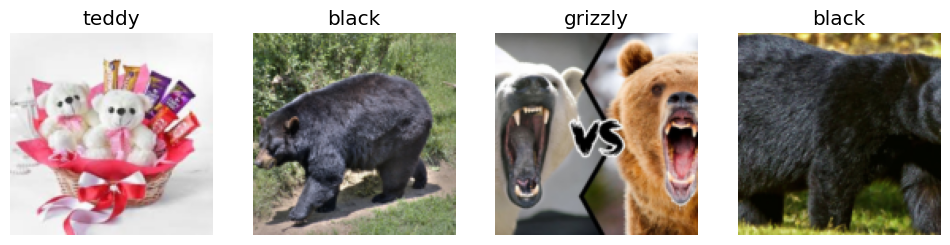

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

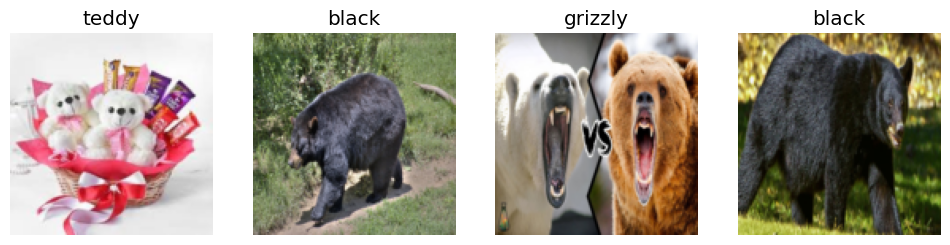

In [9]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))# type:ignore
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

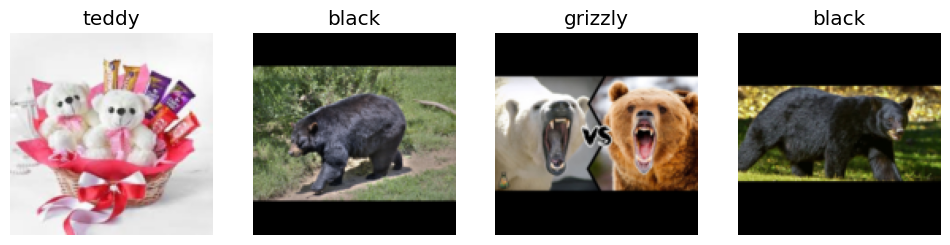

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)


All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time:

In [10]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)


NameError: name 'bears' is not defined

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

### Data Augmentation

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter (note that we're not using `RandomResizedCrop` in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

In [9]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

NameError: name 'bears' is not defined

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our bear classifier.

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [6]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

We can now create our `Learner` and fine-tune it in the usual way:

hschmidt
Henrik Schmidt

2
Sep '20
Hello there,

If you would like to use VSCode for FastAI (v2) note that there is currently a bug in the VSCode Python extension (as far as I can tell) that causes the output of anything involving progress bars to be rendered incorrectly. I’ve submitted a bug report that can be tracked here 14. You can see the result if you try to run the 01_intro.ipynb. It shows up in the first training and causes the result to disappear.

I’ve tried to create a workaround if you would still want to use VSCode. It doesn’t quite work but at least you get some of the output. I’m not sure yet why it doesn’t return all the output.

Paste the following into the notebook before training:

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [7]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [13]:


learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.168473,0.640857,0.195122,00:23
1,0.866645,0.324770,0.121951,00:23
2,0.664657,0.215416,0.097561,00:23
3,0.525081,0.141768,0.073171,00:23


Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a *confusion matrix*:

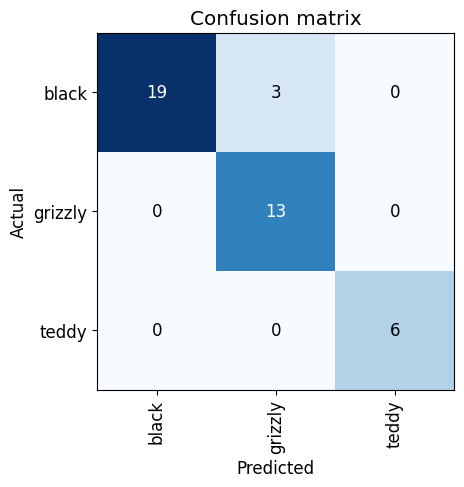

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

This tells us where the loss is the highest..
a loss is a measurement of how good our model is.
a loss will be bad if we predict wrongly and we are confident about our prediction.

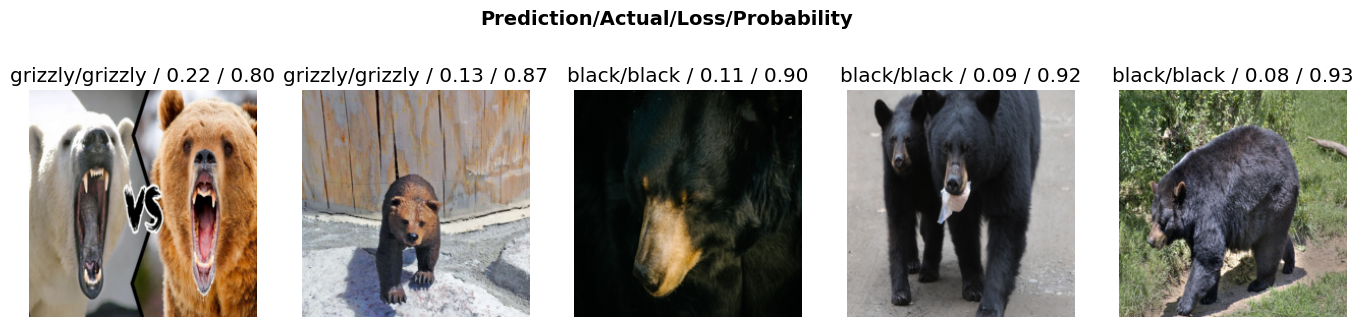

In [18]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

in this example,
1. in the first image we are 80% sure its a grizzly
2. in the second image we are 87% sure its a grizzly
3. in the third image we are 90% sure its black
4. in the fourth image we are 92% sure its black
5. in the fifth image we are 93% sure its black

you can have a big loss if you are wrong and confident or right and unconfident


In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():    shutil.move(str(cleaner.fns[idx]), path/cat)

We can see that amongst our "black bears" is an image that contains two bears: one grizzly, one black. So, we should choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

## Gradio